#Task 1 - Fitbit Dataset

1. Read this dataset in pandas , mysql and mongodb 
3. convert all the dates avaible in dataset to timestamp format in pandas and in sql you to convert it in date format
4. Find out in this data that how many unique id's we have 
5. which id is one of the active id that you have in whole dataset 
6. how many of them have not logged there activity find out in terms of number of ids 
7. Find out who is the laziest person id that we have in dataset 
8. Explore over an internet that how much calories burn is required for a healthy person and find out how many healthy person we have in our dataset 
9. how many person are not a regular person with respect to activity try to find out those 
10. who is the thired most active person in this dataset find out those in pandas and in sql both . 
11. who is the 5th most laziest person avilable in dataset find it out 
12. what is a total acumulative calories burn for a person find out 


### 1. Load the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('FitBit data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

### 2. Convert all the dates to timestamp format

In [5]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

In [6]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.110000,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.550000,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.530000,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.930000,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.850000,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,2016-04-08,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
453,8877689391,2016-04-09,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
454,8877689391,2016-04-10,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
455,8877689391,2016-04-11,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820


### 3. How many unique id's we have

In [7]:
unique_ids = df[['Id']].nunique()
print(unique_ids)

Id    35
dtype: int64


### 4. Which id is one of the active id that you have in whole dataset 


In [8]:
most_active = df.groupby('Id')['TotalSteps'].sum().sort_values(ascending=False).nlargest(1)

print(f'The id with most active is {list(most_active.index)[0]} and Total Steps are {list(most_active)[0]}')

The id with most active is 1503960366 and Total Steps are 221170


####  Extra Task: the top 10 active id's and their respective total steps

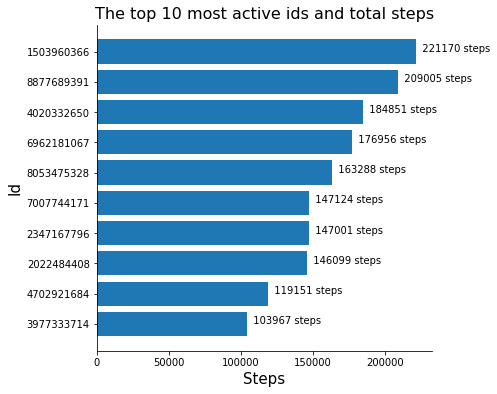

In [9]:
top10= df.groupby('Id')['TotalSteps'].sum().sort_values().tail(10)
x = top10.index.astype(str)
y = top10.values


# Plotting
plt.figure(figsize=(6,6))
for index, value in enumerate(y):
    plt.text(value, index,'  '+ str( value)+' steps')

# bar plot
plt.barh(x,y)
plt.title('The top 10 most active ids and total steps',fontsize=16)
plt.xlabel('Steps',fontsize=15)
plt.ylabel('Id',fontsize=15)
sns.despine()
plt.show()

### 5. how many of them have not logged there activity find out in terms of number of ids 

In [10]:
total_ids = df.groupby('Id')['LoggedActivitiesDistance'].sum()
not_logged = total_ids[total_ids == 0]
not_logged.count()
print(f'Total number of ids that not logged their activity are {not_logged.count()}.')

Total number of ids that not logged their activity are 29.


In [11]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.110000,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.550000,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.530000,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.930000,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.850000,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,2016-04-08,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
453,8877689391,2016-04-09,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
454,8877689391,2016-04-10,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
455,8877689391,2016-04-11,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820


### 6. Find out who is the laziest person id that we have in dataset 

In [12]:
# most laziest from the total steps and calories burnt as metrics

most_lazy = df.groupby('Id').sum().sort_values(by='TotalSteps')

In [13]:
print(most_lazy.iloc[0])

TotalSteps                      0.0
TotalDistance                   0.0
TrackerDistance                 0.0
LoggedActivitiesDistance        0.0
VeryActiveDistance              0.0
ModeratelyActiveDistance        0.0
LightActiveDistance             0.0
SedentaryActiveDistance         0.0
VeryActiveMinutes               0.0
FairlyActiveMinutes             0.0
LightlyActiveMinutes            0.0
SedentaryMinutes            11074.0
Calories                    14442.0
Name: 4388161847, dtype: float64


In [14]:
# id of the most lazy person in the dataset with total steps and calories as metrics

print(f'Most laziest person id : {(most_lazy.iloc[0]).name}')

Most laziest person id : 4388161847


In [15]:
df.groupby(['Id'])[['ActivityDate']].count().sort_values(by='ActivityDate',ascending=False)

,ActivityDate
Id,
4057192912,32
4020332650,32
1503960366,19
1624580081,19
2347167796,15
4702921684,15
4445114986,15
6962181067,14
2320127002,12


### 8. how many person are not a regular person with respect to activity try to find out those 


In [16]:
# Total number of days the data is recorded for 

total_days = df['ActivityDate'].nunique()
min_days = int(total_days/2)

In [17]:
print(f'Total number of days:  {total_days}')

# Criteria to consider whether a user is a regular or not 
print(f'Minimum Criteria to be considered as a regular user is {min_days} days.')

Total number of days:  32
Minimum Criteria to be considered as a regular user is 16 days.


In [18]:
active_days = df.groupby(['Id'])[['ActivityDate']].count()

In [19]:
irregular = active_days[active_days <= min_days].dropna()
print(f'Number of users that are not consistent are {len(irregular)}')

Number of users that are not consistent are 31


### 9. who is the third most active person in this dataset 


In [20]:
active = df.groupby('Id').sum()

In [21]:
# Third most active person using TotalDistance as a metric

active_3 = active.sort_values('TotalDistance',ascending=False).iloc[2]
active_3
print(f'The third most active person is with id {active_3.name}')

The third most active person is with id 4020332650


### 10. who is the 5th most laziest person avilable in dataset find it out

In [22]:
lazy_5 = active.sort_values('TotalDistance').head().iloc[4]
print(f'The 5th most laziest person is with id {lazy_5.name}.')

The 5th most laziest person is with id 1927972279.


### 11. what is a total acumulative calories burn for a person find out

In [23]:
total_calories = df.groupby("Id")[['Calories']].sum()
total_calories

,Calories
Id,
1503960366,34128
1624580081,25705
1644430081,29164
1844505072,19391
1927972279,27048
2022484408,29704
2026352035,16266
2320127002,18385
2347167796,30320


### 7. Explore over an internet that how much calories burn is required for a healthy person
### and find out how many healthy person we have in our dataset

In [28]:
# An average person burns 2000 calories per day
healthy_per_day = 2000
print('Calorie Burn per day: ',healthy_per_day)

active_days = df.ActivityDate.nunique()
print('Number of active days:',active_days)

healthy = healthy_per_day*active_days
print('Minimum calories to burn:', healthy)

Calorie Burn per day:  2000
Number of active days: 32
Minimum calories to burn: 64000


In [25]:
total_calories.head(3) # from previous solution

,Calories
Id,
1503960366,34128
1624580081,25705
1644430081,29164


In [31]:
healthy_person = total_calories/healthy

In [32]:
healthy_person[healthy_person >= 1].dropna()

# According to our criteria, only one person qualifies as healthy person

,Calories
Id,
4020332650,1.537688
